In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from numpy import asarray
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense
from keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,MaxPool2D
from keras.models import load_model
from keras.models import Model
import os
from tensorflow.keras import models
from keras.models import load_model
from keras.models import Model
import os
from tensorflow.keras import models
import cv2
import PIL
from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Lambda, Dense,Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=5
CHANNELS=3

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Data_new",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 334 files belonging to 2 classes.


In [ ]:
print(dataset[0])

In [ ]:
class_names=dataset.class_names
class_names

['Control Group', 'DM Group']

In [ ]:
len(dataset)

67

In [ ]:
train_size=0.8
len(dataset)*train_size

53.6

In [ ]:
train_ds=dataset.take(53)
len(train_ds)

53

In [ ]:
test_ds=dataset.skip(53)
len(test_ds)

14

In [ ]:
val_size=0.1
len(dataset)*val_size


6.7

In [ ]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [ ]:
for image_batch,label_batch in dataset.take(2):
  print(image_batch.shape)
  print(label_batch.numpy())

(5, 224, 224, 3)
[1 1 0 1 1]
(5, 224, 224, 3)
[0 1 1 0 1]


In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


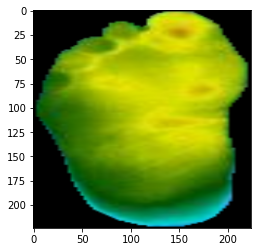

In [ ]:
for image_batch,label_batch in dataset.take(1):
 # print(image_batch[0].shape)
  plt.imshow(image_batch[0].numpy().astype("uint8"))

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)



In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [ ]:
n_classes=2
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)

#VGG-16 model

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(2,2), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(2,2), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(2,2), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=2048,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [ ]:
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.optimizers import Adam


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 224, 224, 128)     3584      
                                                                 
 conv2d_51 (Conv2D)          (None, 224, 224, 64)      73792     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 112, 112, 128)     32896     
                                                                 
 conv2d_53 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
              )

In [ ]:
history=model.fit(
    train_ds,
    epochs=50,
    verbose=1,
    validation_data=val_ds

)

Epoch 1/50
53/53 [==============================] - 6s 99ms/step - loss: 5509.0698 - accuracy: 0.7019 - val_loss: 0.6349 - val_accuracy: 0.6667
Epoch 2/50
53/53 [==============================] - 5s 96ms/step - loss: 0.5884 - accuracy: 0.7396 - val_loss: 0.5433 - val_accuracy: 0.6667
Epoch 3/50
53/53 [==============================] - 5s 96ms/step - loss: 0.5081 - accuracy: 0.7358 - val_loss: 0.6310 - val_accuracy: 0.6000
Epoch 4/50
53/53 [==============================] - 5s 96ms/step - loss: 0.8442 - accuracy: 0.6528 - val_loss: 0.5787 - val_accuracy: 0.6667
Epoch 5/50
53/53 [==============================] - 5s 96ms/step - loss: 0.7191 - accuracy: 0.7019 - val_loss: 0.6611 - val_accuracy: 0.6667
Epoch 6/50
53/53 [==============================] - 5s 95ms/step - loss: 1.0978 - accuracy: 0.7321 - val_loss: 0.6355 - val_accuracy: 0.6667
Epoch 7/50
53/53 [==============================] - 5s 95ms/step - loss: 0.7057 - accuracy: 0.7132 - val_loss: 0.6389 - val_accuracy: 0.6667
Epoch 8/50

In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 2s 158ms/step - loss: 0.6536 - accuracy: 0.6667


In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(actual, predicted)

In [ ]:
history.history['accuracy']

[0.701886773109436,
 0.7396226525306702,
 0.7358490824699402,
 0.652830183506012,
 0.701886773109436,
 0.7320754528045654,
 0.7132075428962708,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306702,
 0.7396226525306

In [ ]:
from tensorflow.python.ops.math_ops import mean
import statistics
from statistics import mean


mean(history.history['accuracy'])

0.7356226503849029

#Alexnet Model

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers
model = keras.Sequential()
model.add(layers.Conv2D(filters=96, kernel_size=(11, 11),
                        strides=(4, 4), activation="relu",
                        input_shape=(224, 224, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
model.add(layers.Conv2D(filters=256, kernel_size=(5, 5),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3),
                        strides=(1, 1), activation="relu",
                        padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(
    train_ds,
    epochs=50,
    verbose=1,
    validation_data=val_ds

)

Epoch 1/50
53/53 [==============================] - 52s 116ms/step - loss: 2.2065 - accuracy: 0.6868 - val_loss: 0.3793 - val_accuracy: 0.8000
Epoch 2/50
53/53 [==============================] - 1s 15ms/step - loss: 1.0462 - accuracy: 0.7811 - val_loss: 0.3066 - val_accuracy: 0.8667
Epoch 3/50
53/53 [==============================] - 1s 15ms/step - loss: 0.4703 - accuracy: 0.8377 - val_loss: 0.5057 - val_accuracy: 0.8333
Epoch 4/50
53/53 [==============================] - 1s 15ms/step - loss: 0.3721 - accuracy: 0.8792 - val_loss: 0.3912 - val_accuracy: 0.8667
Epoch 5/50
53/53 [==============================] - 1s 15ms/step - loss: 0.1837 - accuracy: 0.9434 - val_loss: 0.5983 - val_accuracy: 0.8667
Epoch 6/50
53/53 [==============================] - 1s 15ms/step - loss: 0.1857 - accuracy: 0.9283 - val_loss: 0.3641 - val_accuracy: 0.8667
Epoch 7/50
53/53 [==============================] - 1s 15ms/step - loss: 0.0841 - accuracy: 0.9585 - val_loss: 0.2291 - val_accuracy: 0.8333
Epoch 8/50


In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 1s 40ms/step - loss: 0.2539 - accuracy: 0.9231


In [ ]:
history.history['accuracy']

[0.6867924332618713,
 0.7811321020126343,
 0.8377358317375183,
 0.8792452812194824,
 0.9433962106704712,
 0.9283018708229065,
 0.9584905505180359,
 0.9849056601524353,
 0.99622642993927,
 0.99245285987854,
 0.99245285987854,
 1.0,
 0.99622642993927,
 0.99622642993927,
 0.99622642993927,
 0.99245285987854,
 0.99245285987854,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99622642993927,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
from tensorflow.python.ops.math_ops import mean
import statistics
from statistics import mean


mean(history.history['accuracy'])

0.9790188705921173



```
# This is formatted as code
```

#DenseNet model

In [ ]:
model = models.Sequential([
    resize_and_rescale,data_augmentation,
    layers.Conv2D(16,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(n_classes,activation='softmax')

])

In [ ]:
model.build(input_shape=input_shape)
EPOCHS=50

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (5, 224, 224, 3)          0         
                                                                 
 sequential_1 (Sequential)   (5, 224, 224, 3)          0         
                                                                 
 conv2d_11 (Conv2D)          (5, 222, 222, 16)         448       
                                                                 
 max_pooling2d_9 (MaxPooling  (5, 111, 111, 16)        0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (5, 109, 109, 32)         4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (5, 54, 54, 32)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
              )

In [ ]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    verbose=1,
    validation_data=val_ds

)

Epoch 1/50
53/53 [==============================] - 3s 12ms/step - loss: 0.6121 - accuracy: 0.7057 - val_loss: 0.5734 - val_accuracy: 0.7000
Epoch 2/50
53/53 [==============================] - 0s 9ms/step - loss: 0.5637 - accuracy: 0.7245 - val_loss: 0.4444 - val_accuracy: 0.7000
Epoch 3/50
53/53 [==============================] - 0s 9ms/step - loss: 0.5052 - accuracy: 0.6981 - val_loss: 0.4646 - val_accuracy: 0.7000
Epoch 4/50
53/53 [==============================] - 0s 9ms/step - loss: 0.4472 - accuracy: 0.7245 - val_loss: 0.3786 - val_accuracy: 0.7000
Epoch 5/50
53/53 [==============================] - 0s 9ms/step - loss: 0.4353 - accuracy: 0.7358 - val_loss: 0.4600 - val_accuracy: 0.7000
Epoch 6/50
53/53 [==============================] - 0s 9ms/step - loss: 0.4436 - accuracy: 0.7208 - val_loss: 0.4451 - val_accuracy: 0.7000
Epoch 7/50
53/53 [==============================] - 0s 9ms/step - loss: 0.4096 - accuracy: 0.7736 - val_loss: 0.3490 - val_accuracy: 0.8667
Epoch 8/50
53/53 [=

In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 0s 28ms/step - loss: 0.1464 - accuracy: 0.9487


In [ ]:
history.history['accuracy']

[0.7056604027748108,
 0.7245283126831055,
 0.698113203048706,
 0.7245283126831055,
 0.7358490824699402,
 0.7207547426223755,
 0.7735849022865295,
 0.7547169923782349,
 0.7433962225914001,
 0.7622641324996948,
 0.8037735819816589,
 0.7924528121948242,
 0.800000011920929,
 0.8037735819816589,
 0.8150943517684937,
 0.845283031463623,
 0.8113207817077637,
 0.8415094614028931,
 0.849056601524353,
 0.852830171585083,
 0.852830171585083,
 0.8566038012504578,
 0.852830171585083,
 0.8830188512802124,
 0.8754717111587524,
 0.8377358317375183,
 0.8566038012504578,
 0.8981131911277771,
 0.845283031463623,
 0.849056601524353,
 0.8301886916160583,
 0.8150943517684937,
 0.8754717111587524,
 0.8754717111587524,
 0.9056603908538818,
 0.845283031463623,
 0.8830188512802124,
 0.8641509413719177,
 0.8905660510063171,
 0.8716981410980225,
 0.8603773713111877,
 0.8943396210670471,
 0.8867924809455872,
 0.8641509413719177,
 0.8603773713111877,
 0.8679245114326477,
 0.8754717111587524,
 0.8754717111587524,
 0

In [ ]:
from tensorflow.python.ops.math_ops import mean
import statistics
from statistics import mean


mean(history.history['accuracy'])

0.8297358548641205

#EfficientNet model

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')

21848064/21834768 [==============================] - 0s 0us/step


In [ ]:
model = EfficientNetB0(include_top=False, weights='imagenet')


16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
model = EfficientNetB0(weights='imagenet', drop_connect_rate=0.4)


In [ ]:
model.summary();

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization_2 (Normalization  (None, 224, 224, 3)  7          ['rescaling_3[0][0]']            
 )                                                                                                
                                                                                     

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
              )

In [ ]:
history=model.fit(
    train_ds,
    epochs=50,
    verbose=1,
    validation_data=val_ds

)

Epoch 1/50
53/53 [==============================] - 14s 90ms/step - loss: 1.4796 - accuracy: 0.7057 - val_loss: 0.2772 - val_accuracy: 0.9000
Epoch 2/50
53/53 [==============================] - 4s 67ms/step - loss: 0.2948 - accuracy: 0.8981 - val_loss: 0.1893 - val_accuracy: 0.9667
Epoch 3/50
53/53 [==============================] - 4s 67ms/step - loss: 0.2711 - accuracy: 0.9057 - val_loss: 0.3791 - val_accuracy: 0.8667
Epoch 4/50
53/53 [==============================] - 4s 68ms/step - loss: 0.1280 - accuracy: 0.9434 - val_loss: 0.1765 - val_accuracy: 0.9333
Epoch 5/50
53/53 [==============================] - 4s 70ms/step - loss: 0.1333 - accuracy: 0.9472 - val_loss: 0.2536 - val_accuracy: 0.9333
Epoch 6/50
53/53 [==============================] - 4s 68ms/step - loss: 0.2661 - accuracy: 0.9057 - val_loss: 0.4000 - val_accuracy: 0.9000
Epoch 7/50
53/53 [==============================] - 4s 69ms/step - loss: 0.1635 - accuracy: 0.9396 - val_loss: 0.5863 - val_accuracy: 0.9000
Epoch 8/50
5

In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 1s 15ms/step - loss: 0.0051 - accuracy: 1.0000


In [ ]:
history.history['accuracy']

[0.7056604027748108,
 0.8981131911277771,
 0.9056603908538818,
 0.9433962106704712,
 0.947169840335846,
 0.9056603908538818,
 0.9396226406097412,
 0.9622641801834106,
 0.9735848903656006,
 0.9622641801834106,
 0.9735848903656006,
 1.0,
 0.9886792302131653,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
from tensorflow.python.ops.math_ops import mean
import statistics
from statistics import mean


mean(history.history['accuracy'])

0.9821132087707519